In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

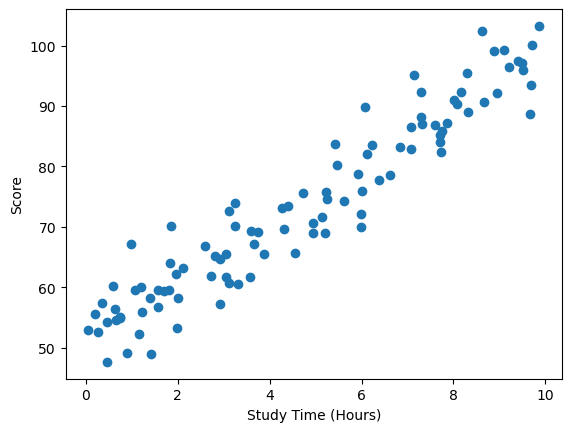

In [205]:
data = pd.read_csv("data.csv")
plt.scatter(data.study_time, data.score)
plt.xlabel("Study Time (Hours)")
plt.ylabel("Score")
plt.show()

In [206]:
def calculateLoss(points, m, b):
    n = len(points)
    total_error = 0
    for i in range(n):
        x = points.iloc[i].study_time
        y = points.iloc[i].score
        total_error += (y - (m * x + b)) ** 2
    return total_error / n 

In [207]:
def gradient_descent(points, m_now, b_now, L = 0.01):
    m_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].study_time
        y = points.iloc[i].score

        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))

    m_now = m_now - L * m_gradient
    b_now = b_now - L * b_gradient
    return m_now, b_now

Epoch: 0
Epoch: 200
Epoch: 400
Epoch: 600


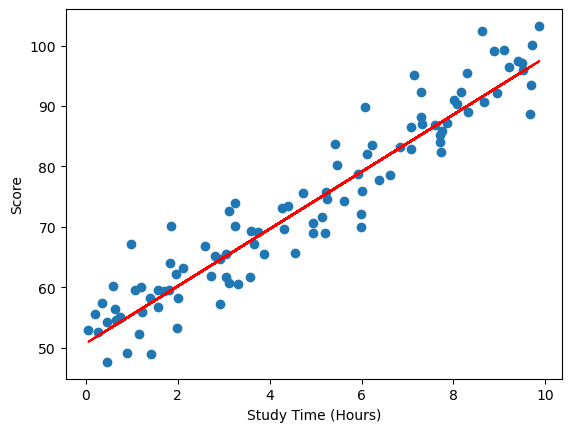

In [208]:
m_now = 0
b_now = 50
epochs = 800
epoch_loss = {}

for i in range(epochs):
    if i % 200 == 0:
        print(f"Epoch: {i}")
        m_now, b_now = gradient_descent(data, m_now, b_now)
        loss = round(calculateLoss(data, m_now, b_now), 2)
        epoch_loss[i] = loss
        
plt.scatter(data.study_time, data.score)
plt.xlabel("Study Time (Hours)")
plt.ylabel("Score")
plt.plot(data.study_time, m_now * data.study_time + b_now, color="red")
plt.show()

In [209]:
loss = round(calculateLoss(data, m_now, b_now), 2)
y_true = data.score
y_pred = m_now * data.study_time + b_now
r2 = r2_score(y_true,y_pred)
print(f"Loss: {loss}%")
print(f"R^2 Score: ", r2)

Loss: 20.45%
R^2 Score:  0.9068491472902427
